## STEP 3 Part 2 of 2 - FINAL PROJECT
### Part 2: Predict using best model and feature importance
### Rakamin - Data Science Batch 47
## Group 3 <br>
# **Byte Me** <br>
Hijir Della Wirasti <br>
Mauliddinia Iftikhar Agnany <br>
Jericho Medion Haryono <br>
Fakhri Dwi Nugroho <br>
Ryan Nofandi <br>

In [ ]:
import pickle
model = pickle.load(open('xgb_model.pkl','rb')) #tidak jadi dipakai


In [ ]:
import pandas as pd

In [ ]:
# Ignore all warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('df_train_log.csv')

#Data split

In [ ]:
# prompt: predict df to model

import numpy as np
# Assuming 'target_column' is the name of the column you want to predict
target_column = 'TARGET' # Replace with your actual target column name

# Separate features (X) and target (y)
X = df.drop(target_column, axis=1)
y = df[target_column]


In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Inisialisasi SMOTE
smote = SMOTE(sampling_strategy=0.5)  # Menambah kelas minoritas hingga mencapai 50% dari kelas mayoritas

# Terapkan SMOTE ke data yang sudah discaling
X_smote, y_smote = smote.fit_resample(X, y)

# Print distribusi kelas setelah SMOTE
print(f'Distribusi kelas sebelum SMOTE: {Counter(y)}')
print(f'Distribusi kelas setelah SMOTE: {Counter(y_smote)}')

# Optional: Tampilkan beberapa baris data hasil resampling
print(pd.DataFrame(X_smote, columns=X.columns).head())

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, make_scorer, fbeta_score


X_train_over, X_test_over, y_train_over, y_test_over = train_test_split(X_smote, y_smote, test_size=0.3, random_state=42)


In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Inisialisasi SMOTE
smote = SMOTE(sampling_strategy=0.5)  # Menambah kelas minoritas hingga mencapai 50% dari kelas mayoritas

# Terapkan SMOTE ke data yang sudah discaling
X_smote, y_smote = smote.fit_resample(X, y)

# Print distribusi kelas setelah SMOTE
print(f'Distribusi kelas sebelum SMOTE: {Counter(y)}')
print(f'Distribusi kelas setelah SMOTE: {Counter(y_smote)}')

# Optional: Tampilkan beberapa baris data hasil resampling
print(pd.DataFrame(X_smote, columns=X.columns).head())

Distribusi kelas sebelum SMOTE: Counter({0: 278843, 1: 24396})
Distribusi kelas setelah SMOTE: Counter({0: 278843, 1: 139421})
   NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
0                   1            1             0                1   
1                   1            0             0                0   
2                   0            1             1                1   
3                   1            0             0                1   
4                   1            1             0                1   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0             0          0.245232    0.489165     0.537519   
1             0          0.279376    0.746352     0.610113   
2             0          0.114839    0.244144     0.281827   
3             0          0.197108    0.430799     0.573762   
4             0          0.184602    0.540824     0.513488   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  ...  \
0                           0      

#Initialization

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, make_scorer, fbeta_score


X_train_over, X_test_over, y_train_over, y_test_over = train_test_split(X_smote, y_smote, test_size=0.3, random_state=42)


In [ ]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)

    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Metrics calculation
    metrics = {
        "Accuracy (Train Set)": accuracy_score(y_train, y_train_pred),
        "Accuracy (Test Set)": accuracy_score(y_test, y_test_pred),
        "Precision (Test Set)": precision_score(y_test, y_test_pred),
        "Recall (Test Set)": recall_score(y_test, y_test_pred),
        "F1-Score (Test Set)": f1_score(y_test, y_test_pred),
        "F2-Score (Test Set)": fbeta_score(y_test, y_test_pred, beta=2),
    }

    # Calculate ROC AUC if the model supports predict_proba
    try:
        metrics["ROC AUC (Train Set)"] = roc_auc_score(y_train, model.predict_proba(X_train)[:, 1])
        metrics["ROC AUC (Test Set)"] = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    except AttributeError:
        metrics["ROC AUC (Train Set)"] = None
        metrics["ROC AUC (Test Set)"] = None

    # Cross-validation recall score
    metrics["Recall (Cross-Validation Train)"] = cross_val_score(model, X_train, y_train, cv=5, scoring=make_scorer(recall_score)).mean()
    metrics["Recall (Cross-Validation Test)"] = cross_val_score(model, X_test, y_test, cv=5, scoring=make_scorer(recall_score)).mean()

    return metrics

# Model XGB Oversampling (Tanpa Best Parameter)

In [ ]:
import xgboost as xgb

# Define the XGBoost model
model_xgb = xgb.XGBClassifier(device='cuda') #pake runtime T4 GPU

# Fit the model to the oversampled training data
model_xgb.fit(X_train_over, y_train_over)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device='cuda', early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
# Evaluate the model
metrics_xgb_over = evaluate_model(model_xgb, X_train_over, X_test_over, y_train_over, y_test_over)

# Display the metrics
print("Evaluation Metrics on Oversampled Data with XGBoost:")
for metric, value in metrics_xgb_over.items():
    print(f"{metric}: {value:.4f}")

Evaluation Metrics on Oversampled Data with XGBoost:
Accuracy (Train Set): 0.9366
Accuracy (Test Set): 0.9330
Precision (Test Set): 0.9873
Recall (Test Set): 0.8097
F1-Score (Test Set): 0.8897
F2-Score (Test Set): 0.8399
ROC AUC (Train Set): 0.9562
ROC AUC (Test Set): 0.9372
Recall (Cross-Validation Train): 0.8114
Recall (Cross-Validation Test): 0.8083


In [ ]:
del df['predictions']
# Make predictions
y_pred = model_xgb.predict(X)

# Add predictions to the DataFrame
df['predictions'] = y_pred

# Print the first few rows of the DataFrame with predictions
df.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,...,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,NEW_DAYS_EMPLOYED_PERC,NEW_INCOME_CREDIT_PERC,NEW_ANNUITY_INCOME_PERC,NEW_PAYMENT_RATE,predictions
0,1,1,1,0,1,0,0.245232,0.489165,0.537519,0,...,0,0,0,0,0,0.067329,0.498036,0.121975,0.060748,0
1,0,1,0,0,0,0,0.279376,0.746352,0.610113,0,...,0,0,0,0,0,0.070862,0.208736,0.132215,0.027598,0
2,0,0,1,1,1,0,0.114839,0.244144,0.281827,0,...,0,0,0,0,0,0.011814,0.500000,0.100000,0.050000,0
3,0,1,0,0,1,0,0.197108,0.430799,0.573762,0,...,0,0,0,0,0,0.159905,0.431749,0.219896,0.094940,0
4,0,1,1,0,1,0,0.184602,0.540824,0.513488,0,...,0,0,0,0,0,0.152418,0.236842,0.179959,0.042622,0


In [ ]:
df['TARGET'].value_counts()

,count
TARGET,
0,278843
1,24396


In [ ]:
df['predictions'].value_counts()

,count
predictions,
0,301491
1,1748


# Feature Importance dari XGB Oversampled

In [ ]:
!pip install shap

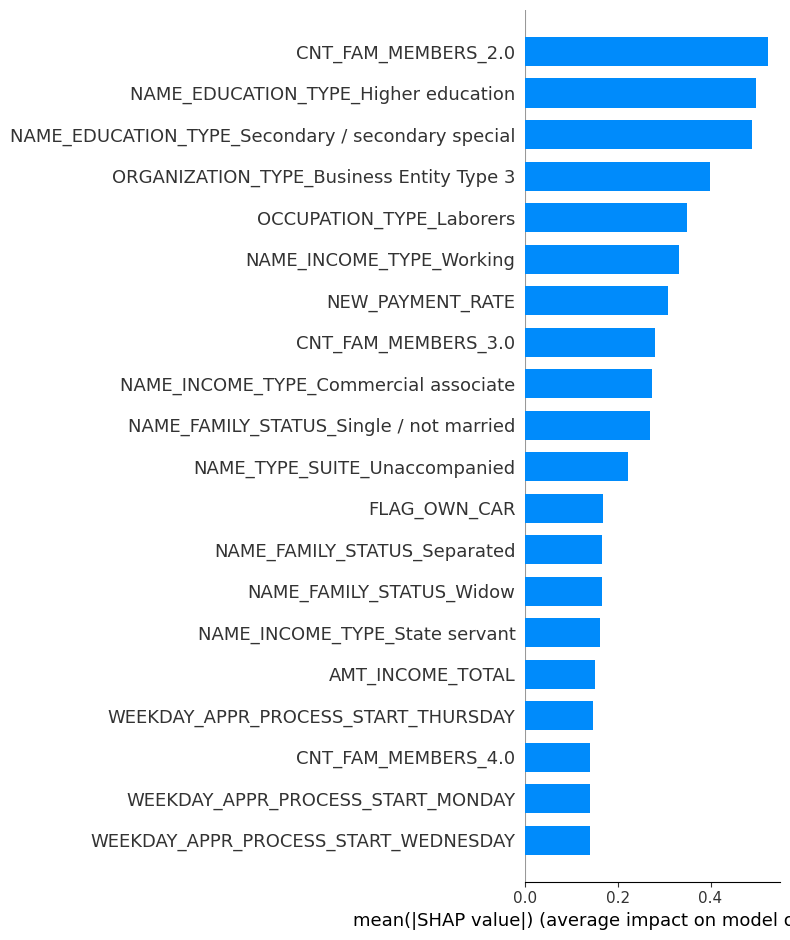

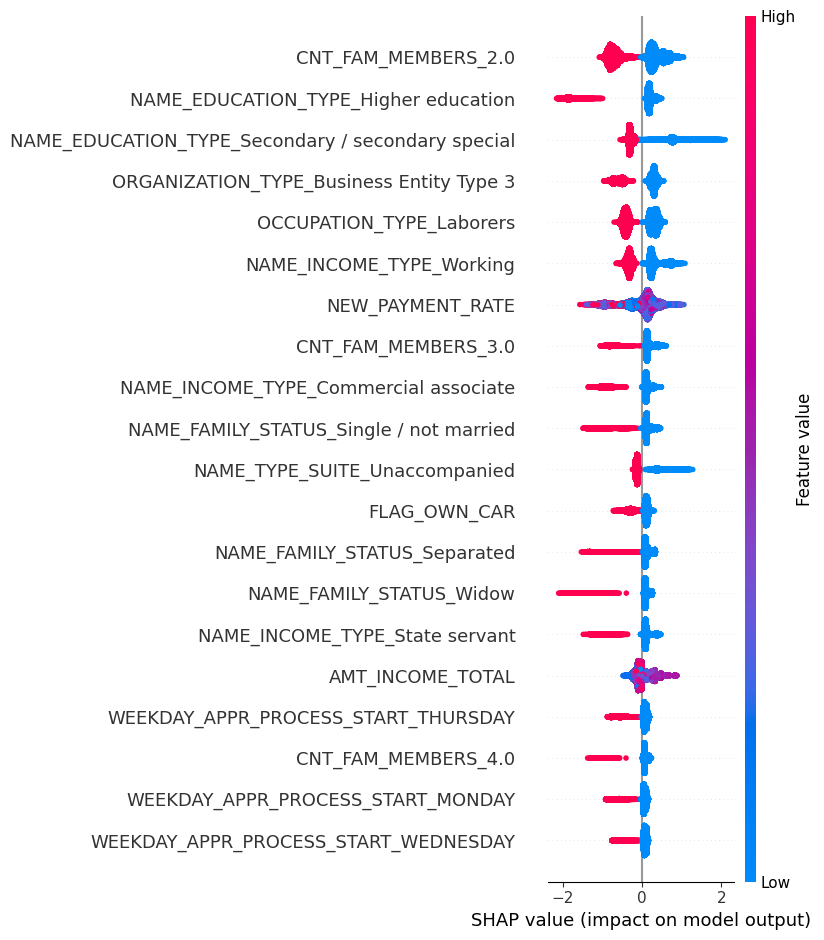

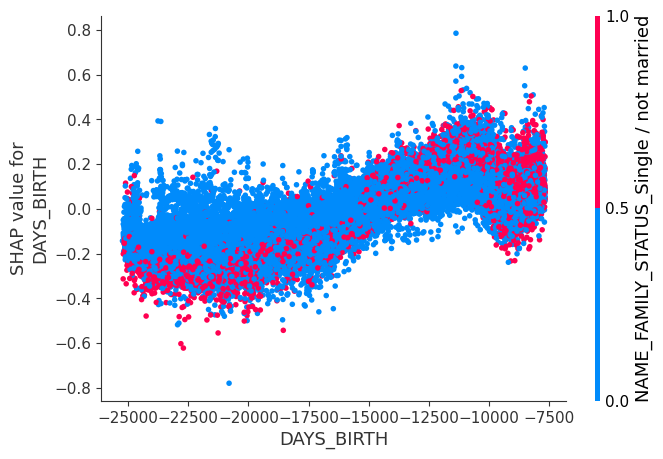

In [ ]:
import shap
# Initialize SHAP explainer for the XGBoost model
explainer = shap.TreeExplainer(model_xgb)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test_over)

# Summary Plot (Bar) - Global view of feature importance based on SHAP values
shap.summary_plot(shap_values, X_test_over, plot_type="bar")

# Detailed Summary Plot - Shows feature importance with SHAP value distribution for each feature
shap.summary_plot(shap_values, X_test_over)

# Dependence Plot for a specific feature (replace "DAYS_BIRTH" with the actual feature name of interest)
shap.dependence_plot("DAYS_BIRTH", shap_values, X_test_over)

# Model XGB Menggunakan Best Parameter (After Hyperparameter) - The Best Model

In [ ]:
import xgboost as xgb

# Define the XGBoost model with best parameters and GPU support
model_xgb_best = xgb.XGBClassifier(
    colsample_bytree=0.6,
    learning_rate=0.2,
    max_depth=7,
    n_estimators=300,
    subsample=1.0,
    random_state=42,
    tree_method='gpu_hist',  # Use GPU for training
    predictor='gpu_predictor',  # Use GPU for predictions
    device='cuda'  # Specify GPU device
)

# Fit the model to the oversampled training data
model_xgb_best.fit(X_train_over, y_train_over)

# Evaluate the model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Predict on the test data
y_test_pred = model_xgb_best.predict(X_test_over)
y_test_pred_proba = model_xgb_best.predict_proba(X_test_over)[:, 1]

# Calculate metrics
metrics_xgb_over = {
    "Test Accuracy": accuracy_score(y_test_over, y_test_pred),
    "Precision": precision_score(y_test_over, y_test_pred),
    "Recall": recall_score(y_test_over, y_test_pred),
    "F1 Score": f1_score(y_test_over, y_test_pred),
    "ROC AUC": roc_auc_score(y_test_over, y_test_pred_proba)
}

# Display the evaluation metrics
print("Evaluation Metrics on Oversampled Data with Best XGBoost Model:")
for metric, value in metrics_xgb_over.items():
    print(f"{metric}: {value:.4f}")


Evaluation Metrics on Oversampled Data with Best XGBoost Model:
Test Accuracy: 0.9347
Precision: 0.9872
Recall: 0.8149
F1 Score: 0.8928
ROC AUC: 0.9400


# Prediksi Menggunakan Data Original dengan XGB (Oversampled + Hyperparameter Tuning) - The Best Model

In [ ]:
# Check if the column 'predictions' exists before attempting to delete it
if 'predictions' in df.columns:
    del df['predictions']

# Make predictions
y_pred = model_xgb_best.predict(X)

# Add predictions to the DataFrame
df['predictions'] = y_pred

# Print the first few rows of the DataFrame with predictions
print(df.head())


   TARGET  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
0       1                   1            1             0                1   
1       0                   1            0             0                0   
2       0                   0            1             1                1   
3       0                   1            0             0                1   
4       0                   1            1             0                1   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0             0          0.245232    0.489165     0.537519   
1             0          0.279376    0.746352     0.610113   
2             0          0.114839    0.244144     0.281827   
3             0          0.197108    0.430799     0.573762   
4             0          0.184602    0.540824     0.513488   

   REGION_POPULATION_RELATIVE  ...  ORGANIZATION_TYPE_Transport: type 1  \
0                           0  ...                                    0   
1             

In [ ]:
df['TARGET'].value_counts()

TARGET
0    278843
1     24396
Name: count, dtype: int64

In [ ]:
df['predictions'].value_counts()

predictions
0    300338
1      2901
Name: count, dtype: int64


**Analisis:**

Setelah penerapan model machine learning **XGBoost (Oversampled + Hyperparameter Tuning)**, hasil prediksi menunjukkan penurunan jumlah nasabah yang dikategorikan sebagai gagal bayar (*default*). Dalam data awal, terdapat **24,396 nasabah (8.04%)** yang teridentifikasi sebagai gagal bayar. Namun, setelah menggunakan model, hanya **2,901 nasabah (0.96%)** yang diprediksi berada dalam kategori gagal bayar.

Penurunan jumlah default ini sejalan dengan tujuan bisnis Home Credit untuk **mengurangi kesalahan dalam mengidentifikasi nasabah default**. Model berhasil meningkatkan akurasi keputusan pemberian pinjaman dengan meminimalkan kasus di mana nasabah diklasifikasikan secara salah sebagai default (false positives). Hal ini berkontribusi pada peningkatan inklusi finansial dengan lebih banyak aplikasi kredit yang diterima secara tepat.

**Keberhasilan dan Implikasi Bisnis:**
- **Pengurangan Kesalahan Default:** Model berhasil menurunkan jumlah prediksi default yang tidak perlu, mendukung tujuan bisnis untuk meminimalkan kesalahan dalam pengelompokan nasabah.
- **Peningkatan Inklusi Finansial:** Dengan lebih banyak nasabah yang diklasifikasikan sebagai non-default, Home Credit dapat memberikan lebih banyak pinjaman secara bertanggung jawab.
- **Optimalisasi Proses Pemberian Kredit:** Model membantu perusahaan lebih fokus pada nasabah dengan risiko tinggi gagal bayar, mendukung strategi mitigasi risiko yang lebih efektif.

**Peluang untuk Evaluasi Lebih Lanjut:**
Meskipun model menunjukkan performa yang baik, penting untuk memastikan bahwa nasabah yang sebenarnya memiliki risiko tinggi gagal bayar tetap dapat teridentifikasi dengan baik. Hal ini dapat dicapai dengan:
1. Menyesuaikan ambang batas (*threshold*) untuk meningkatkan recall pada kelas default.
2. Melakukan analisis lebih dalam terhadap variabel utama yang berkontribusi pada risiko gagal bayar untuk memastikan keakuratan prediksi.

**Kesimpulan:**
Model XGBoost berhasil mendukung tujuan bisnis untuk mengurangi kesalahan identifikasi default dan meningkatkan akurasi pemberian pinjaman. Namun, evaluasi lebih lanjut diperlukan untuk memastikan keseimbangan antara pengurangan kesalahan default dan deteksi risiko gagal bayar secara efektif. Dengan demikian, Home Credit dapat meminimalkan risiko kerugian finansial sekaligus meningkatkan inklusi finansial secara bertanggung jawab.

# Feature Importance dari XGB Oversampled

In [ ]:
!pip install shap

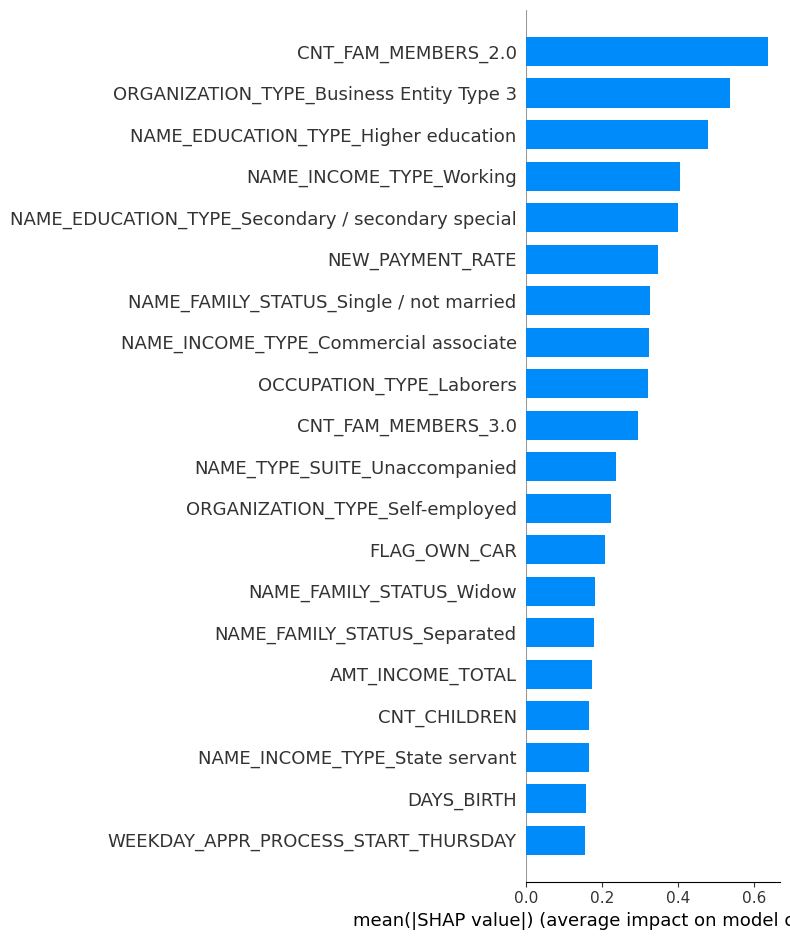

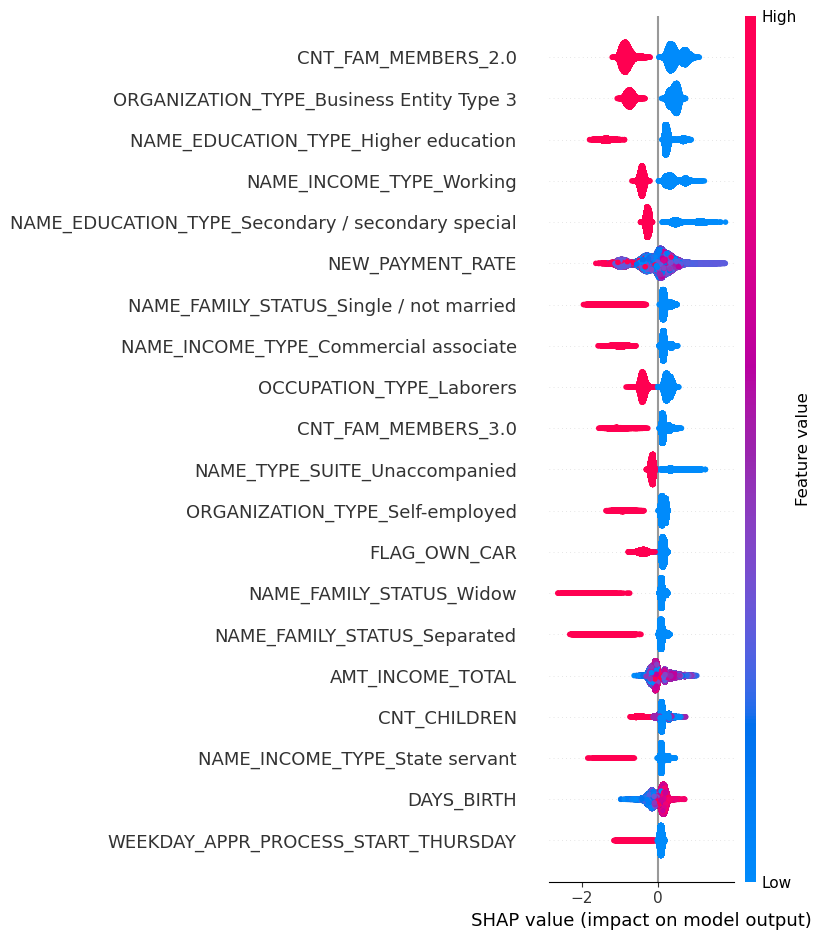

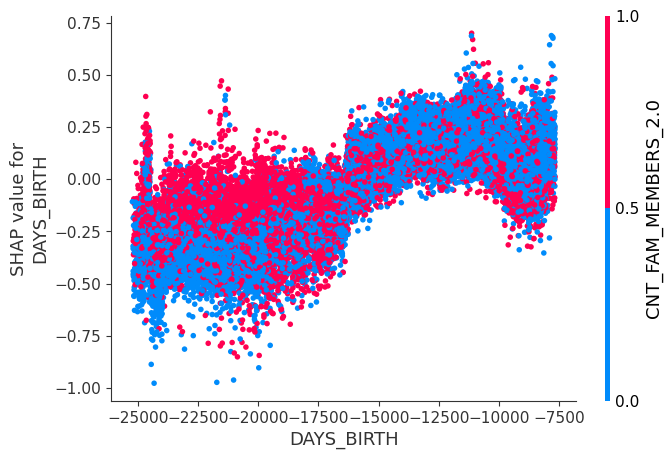

In [ ]:
import shap
# Initialize SHAP explainer for the XGBoost model
explainer = shap.TreeExplainer(model_xgb_best)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test_over)

# Summary Plot (Bar) - Global view of feature importance based on SHAP values
shap.summary_plot(shap_values, X_test_over, plot_type="bar")

# Detailed Summary Plot - Shows feature importance with SHAP value distribution for each feature
shap.summary_plot(shap_values, X_test_over)

# Dependence Plot for a specific feature (replace "DAYS_BIRTH" with the actual feature name of interest)
shap.dependence_plot("DAYS_BIRTH", shap_values, X_test_over)

### **Business Insights dan Rekomendasi Berdasarkan Feature Importance**

---

#### **1. Insights dari Grafik Feature Importance**
1. **CNT_FAM_MEMBERS (Jumlah Anggota Keluarga):**
   - Anggota keluarga sebanyak **2 orang** memiliki pengaruh tertinggi pada model.
   - Artinya, nasabah dengan keluarga kecil cenderung memiliki risiko gagal bayar yang berbeda dibandingkan dengan mereka yang memiliki keluarga besar.
   
   **Insight:**
   - Nasabah dengan keluarga kecil mungkin memiliki stabilitas finansial yang lebih baik, sehingga risiko default lebih rendah.

2. **ORGANIZATION_TYPE_Business Entity Type 3:**
   - Jenis organisasi tempat nasabah bekerja memiliki dampak signifikan.
   - Organisasi seperti "Business Entity Type 3" mungkin menunjukkan jenis pekerjaan atau sektor yang kurang stabil secara finansial.

   **Insight:**
   - Pekerjaan di organisasi dengan risiko tinggi dapat meningkatkan risiko default nasabah.

3. **NAME_EDUCATION_TYPE_Higher Education:**
   - Tingkat pendidikan memengaruhi risiko gagal bayar. Nasabah dengan pendidikan tinggi lebih cenderung memiliki risiko default yang rendah.

   **Insight:**
   - Pendidikan tinggi dapat dikaitkan dengan pendapatan yang lebih stabil dan kemampuan manajemen keuangan yang lebih baik.

4. **NEW_PAYMENT_RATE (Rasio Pembayaran):**
   - Rasio antara jumlah pembayaran terhadap total kredit memiliki pengaruh signifikan.
   - Rasio pembayaran yang lebih tinggi menunjukkan kemampuan nasabah untuk memenuhi kewajiban kreditnya.

   **Insight:**
   - Nasabah dengan rasio pembayaran rendah perlu diperhatikan lebih lanjut karena mereka berpotensi memiliki risiko gagal bayar yang lebih tinggi.

5. **NAME_FAMILY_STATUS_Single/Not Married:**
   - Status keluarga "Single/Not Married" memengaruhi risiko gagal bayar.
   - Status ini mungkin terkait dengan beban finansial yang lebih rendah dibandingkan dengan mereka yang sudah menikah.

   **Insight:**
   - Nasabah yang belum menikah memiliki lebih banyak fleksibilitas dalam pengeluaran, tetapi mungkin juga lebih rentan terhadap gangguan keuangan mendadak.

---

#### **2. Insights dari SHAP Value (Plot Kedua)**
- **Warna merah** menunjukkan nilai fitur yang tinggi, sedangkan **biru** menunjukkan nilai fitur yang rendah.
- Misalnya, untuk fitur **DAYS_BIRTH** (usia), nilai SHAP yang tinggi menunjukkan bahwa usia tertentu dapat menurunkan atau meningkatkan risiko default.

**Key Insight:**
- Usia nasabah, jenis pekerjaan, dan rasio pembayaran adalah faktor-faktor kunci yang sangat memengaruhi prediksi model. Nilai SHAP ini membantu menjelaskan bagaimana setiap fitur memengaruhi keputusan model.

---

#### **3. Insights dari Interaksi (Plot Ketiga - DAYS_BIRTH vs CNT_FAM_MEMBERS_2.0)**
- **Usia dan Jumlah Anggota Keluarga:**
  - Interaksi antara usia (DAYS_BIRTH) dan anggota keluarga memengaruhi risiko default.
  - Nasabah yang lebih tua dan memiliki keluarga kecil cenderung memiliki risiko gagal bayar yang lebih rendah.

**Insight:**
- Usia yang lebih tua sering kali menunjukkan kedewasaan finansial dan pengelolaan keuangan yang lebih baik, sementara keluarga kecil menurunkan beban pengeluaran.

---

### **Rekomendasi Bisnis**
1. **Segmentasi Nasabah Berdasarkan Risiko:**
   - Gunakan variabel kunci seperti **CNT_FAM_MEMBERS**, **NEW_PAYMENT_RATE**, dan **NAME_EDUCATION_TYPE** untuk membuat segmentasi nasabah.
   - Fokuskan analisis risiko pada nasabah yang bekerja di organisasi dengan risiko tinggi (misalnya, "Business Entity Type 3") dan memiliki rasio pembayaran rendah.

2. **Kebijakan Pemberian Kredit yang Berbasis Data:**
   - Berikan penawaran kredit yang lebih kompetitif kepada nasabah dengan pendidikan tinggi, keluarga kecil, dan rasio pembayaran tinggi.
   - Lakukan verifikasi tambahan untuk nasabah dengan pekerjaan di sektor berisiko atau yang menunjukkan pola pengeluaran tidak stabil.

3. **Intervensi Khusus untuk Usia Tertentu:**
   - Berikan panduan atau produk keuangan yang sesuai untuk nasabah yang lebih muda (usia kerja awal) untuk membantu mereka mengelola keuangan lebih baik.

4. **Pemantauan Nasabah Risiko Tinggi:**
   - Implementasikan pengawasan tambahan untuk nasabah dengan **NEW_PAYMENT_RATE** rendah dan bekerja di sektor rentan.
   - Berikan program edukasi keuangan untuk membantu mereka memahami pentingnya pembayaran tepat waktu.

5. **Optimalisasi Penilaian Risiko:**
   - Gunakan SHAP values untuk mengidentifikasi dan memberikan penilaian risiko secara individual, sehingga keputusan kredit menjadi lebih akurat dan terpersonalisasi.

---

### **Kesimpulan**
Feature importance dan SHAP analysis menunjukkan bahwa jumlah anggota keluarga, jenis pekerjaan, tingkat pendidikan, dan rasio pembayaran adalah faktor utama dalam risiko gagal bayar. Dengan memanfaatkan insights ini, Home Credit dapat merancang kebijakan kredit yang lebih cerdas, meningkatkan inklusi finansial, dan meminimalkan risiko gagal bayar.